In [61]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Machine Learning and Statistics 2020 Project

The given data set shows pairs of values. Under the *speed* heading is the wind speed at time of reading and under the *power* heading is the electrical power output for that given wind speed.

By importing and plotting the `powerproduction.csv` a clear shape is evident. Upon research the shape of this plotted data set is called a logistic growth function [https://en.wikipedia.org/wiki/Logistic_function].

![Standard logistic sigmoid function](imgs/Wiki-Logistic-curve.png)


Before I plot the points I remove all rows where the power output is zero. This is obviously due to the machine being off due to maintance or breakdown.

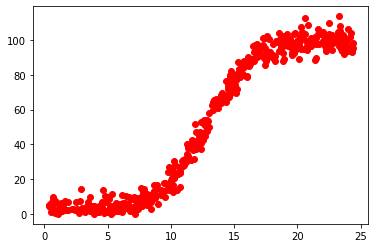

In [2]:
df = pd.read_csv("powerproduction.csv")

#nf = df[1:]
#nz = nf[nf.power != 0]
#df = pd.concat([df[:1] , nz])

# remove all zeros
df = df[df.power != 0]

# put rows in order of speed
df = df.sort_values('speed')

S = df['speed'].to_numpy()
p = df['power'].to_numpy()

plt.scatter(S, p, c="r")

There are many different equations for a logistic function [https://en.wikipedia.org/wiki/Logistic_function]. I first began with the general solution of the general logistic equation, $ \frac{dN}{dt} = rN(1 - \frac{N}{K}) $, where N is the curve's x value, K is curve's maximum value, and r is the logistic growth rate or steepness of the curve. [https://www.khanacademy.org/math/ap-calculus-bc/bc-differential-equations-new/bc-7-9/v/solving-logistic-differential-equation-part2].

$$ \frac{dN}{dt} = rN(1 - \frac{N}{K}) \rightarrow N(t) = \frac{1}{(\frac{1}{N_0} - \frac{1}{K})e^-r(N(t)) + \frac{1}{K}} $$

It can (with a little fiddling) reasonably follow the curve. However in order to do so a two things changed:

1. Increase the min value of the power data.
2. Decrease the max value of the power data.

Of course I could argue that the max values found in the graph (see the stray red dots on the top right-hand corner of the graph or in figure below) are annomalies and I could remove them. Also I could say like in the documentation for XXXXX turbine that they only start to produce power at a certain speed. The first is only a guess and would take a closer look and possibly more data. The second is a complete assumption with no evidence to back it up. I may run this version of the function with these assumptions to see accuracy if I have enough time.

![](imgs/max_P_vals.png)

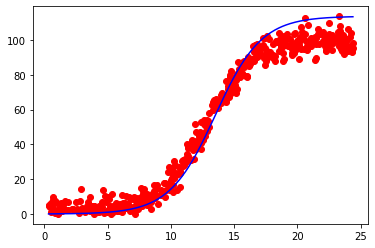

In [3]:
r= 0.55

e = 2.71828

maxN = max(p)
minN = min(p)

#x_0 = 13

P_s = []

for i in range(0, len(S)):

    #N_at_speed_s = maxN/(1 + e**(-r*(p[i]-x_0)))
    N_at_speed_s = 1/(((1/minN - 1/maxN)*e**(-r*(S[i]))) + 1/maxN)
    P_s.append(N_at_speed_s)



plt.scatter(S, p, c="r")    
plt.plot(S, P_s, c="b")
#return s, P_s


I then looked and found a much more simple equation for the  logistic function in the form:

$$ f(x) = \frac{L}{1 + e^{-k(x - x_0)}} $$

where:
- $ x_0 $ is the $ x $ value of the sigmoid's midpoint.
- $ L $ is the curve's maximum value.
- $ k $ is the logistic growth rate or steepness of the curve.

below is the function I created to graph the above function. In it `s` stands for speed ($ x $ in the above equation), `p` stands for power ($ f(x) $ in the above equation), `L` is the maximum value of the curve (same as above calculated as, `max(p)`, greatest value in power), `s_0` is the value of the sigmoid's midpoint ($ x_0 $ in the above equation).

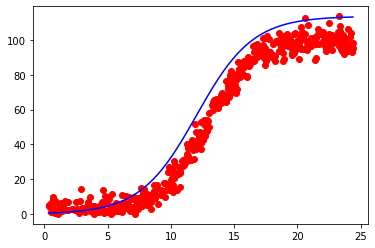

In [4]:
k = 0.45

L = max(p)
s_0 = (max(S)-min(S))/2

P_s = []

for i in range(0, len(S)):

    N_at_speed_s = L/(1 + np.exp(-k*(S[i]-s_0)))
    P_s.append(N_at_speed_s)

plt.scatter(S, p, c="r")    
plt.plot(S, P_s, c="b")
#return s, P_s

There are a few things to note for the above investigations. One is that, just like the first method, the points noted in figure one also scew method 2. Also up to this point the value for the logistic growth rate has been guessed and not optimized.

I'm reluctant to remove the the few straggling points as based on the information given I have to assume they are valid readings. However in practical terms an argument could be made to remove them as to not predict too high a power output. If you wish to predict power output is better to under estimate and have excess then to over estimate and have a deficiency. In other words better to be looking at it then looking for it. Anyway, the values for maximum and minimum values actually don't represent the points accurately. The max and min of the function should be a mean of a sample of the points and the beginning and end of the points.

Next we need to add a way to evaluate the best value for r. Up until now I have just changed it until I get a somewhat good representation of it.

To deal with the max and min values I first have to see what percentage of the points lie where. I will represent this as a histogram in increments of about 2.5 unit speed by using 10 bins.

(array([36., 35., 45., 42., 50., 47., 49., 49., 45., 53.]),
 array([ 0.325 ,  2.7324,  5.1398,  7.5472,  9.9546, 12.362 , 14.7694,
        17.1768, 19.5842, 21.9916, 24.399 ]),
 <a list of 10 Patch objects>)

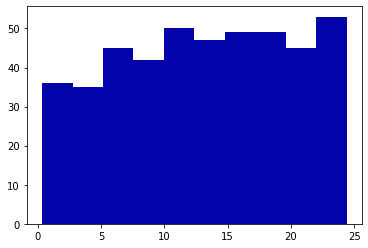

In [5]:
plt.hist(S, bins=10, color='#0504aa',)

From the above we know that 36 values lie within about the first 2.5 unit speed and 53 in the last. Using this information I will use the first 36 points to determine the "min" and the last 53 for the "max" for the function:

Applying this it seems to have made the first method worse but we haven't introduced a way to choose the optimum r value.

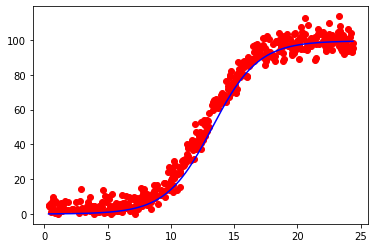

In [6]:
r= 0.55
# distance in meters

e = 2.71828

#minN = sum(p[:36])/36
maxN = sum(p[-53:])/53
minN = min(p)
P_s = []

for i in range(0, len(S)):

    #N_at_speed_s = maxN/(1 + e**(-r*(p[i]-x_0)))
    N_at_speed_s = 1/(((1/minN - 1/maxN)*e**(-r*S[i])) + 1/maxN)
    P_s.append(N_at_speed_s)

P_s = np.array(P_s)

plt.scatter(S, p, c="r")    
plt.plot(S, P_s, c="b")
#return s, P_s


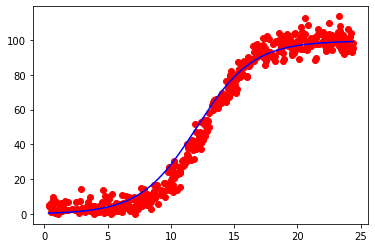

In [37]:
r = 0.45

L = sum(p[-53:])/53
s_0 = (max(S)-min(S))/2

P_s = []

for i in range(0, len(S)):

    N_at_speed_s = L/(1 + np.exp(-r*(S[i]-s_0)))
    P_s.append(N_at_speed_s)

P_s = np.array(P_s)

plt.scatter(S, p, c="r")    
plt.plot(S, P_s, c="b")
#return s, P_s

Next we'll create a method to choose an optimum r value. For this the mean squared error method will be used. It takes the actual value of power and subtracts the predicted value and squares the difference. It does this for each point and the adds the values and divides by the number of points.

In [9]:
def mean_squared_error(actual, predicted):
    """
    Takes two numpy arrays the actual values and the predicted values to 
    determine the accuracy of the prediction.
    """
    ms = 0
    for point in range(len(actual)):
        error = (actual[point] - predicted[point])**2
        ms += error
        mse = ms/len(actual)
    return mse

Next we need toloop through valuesof r to find the best value. Using `numpy.arange()` an array in increments of 0.005 is created and we will test each one:

In [44]:
r_list = np.arange(0, 1, 0.001)

Now we'll tie it all together for both methods. First the solution for general logistic function:

In [45]:
def general_logistic_function(p, S, r, plot = False):
    # p = y
    # time in seconds
    # s = X

    minN = min(p)
    maxN = sum(p[-53:])/53
    #x_0 = 13

    P_s = []
    
    ld = (1/minN - 1/maxN)

    for i in range(0, len(p)):
        #N_at_speed_s = maxN/(1 + e**(-r*(p[i]-x_0)))
        N_at_speed_s = 1/((ld*np.exp(-r*S[i])) + 1/maxN)
        P_s.append(N_at_speed_s)
        
    if plot == True:
        plt.scatter(S, p, c="r")    
        plt.plot(S, P_s, c="b")

    else:
        return P_s

In [46]:
mse_list = []
r_list_output = []
for r in r_list:
    mse_list.append(mean_squared_error(p, general_logistic_function(p, S, r)))
    r_list_output.append(r)
    
min(mse_list)

20.30900982901876

In [47]:
best_r = r_list_output[mse_list.index(min(mse_list))]

In [48]:
best_r

0.577

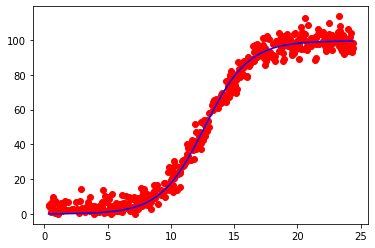

In [49]:
general_logistic_function(p, S, best_r, plot = True)

In [55]:
def logistic_function(p, S, r, plot = False):
    L = sum(p[-53:])/53
    s_0 = (max(S)-min(S))/2

    P_s = []

    for i in range(0, len(S)):

        N_at_speed_s = L/(1 + np.exp(-r*(S[i]-s_0)))
        P_s.append(N_at_speed_s)
    if plot == True:
        plt.scatter(S, p, c="r")    
        plt.plot(S, P_s, c="b")
    else:
        return P_s

In [56]:
mse_list = []
r_list_output = []
for r in r_list:
    mse_list.append(mean_squared_error(p, logistic_function(p, S, r)))
    r_list_output.append(r)
    
min(mse_list)

31.966924580059963

In [57]:
best_r = r_list_output[mse_list.index(min(mse_list))]

In [58]:
best_r

0.515

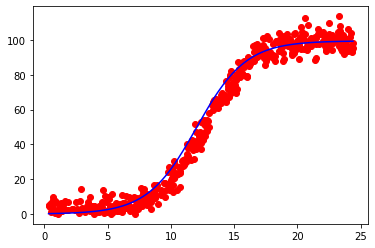

In [59]:
logistic_function(p, S, best_r, plot = True)

In [63]:
X = S.reshape(-1, 1)

In [65]:
neigh_radius = RadiusNeighborsRegressor(radius=1.0)
neigh_radius.fit(X, p)
mean_squared_error(p, neigh_radius.predict(X))

16.27213107328979

In [66]:
neigh_k = KNeighborsRegressor(n_neighbors=2)
neigh_k.fit(X, p)
mean_squared_error(p, neigh_k.predict(X))

8.118431566518849

In [ ]:
a, b, c, d, e = np.polyfit(s, P_s, 4)
plt.plot(s, s*d + (s**2)*c + (s**3)*b + (s**4)*a + e , c="b")

In [ ]:
for i in range(0, 4):
    df = df.loc[df['power']!=df['power'].max()]